In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import os

## 1.Data Preparation

#### Find file location

In [2]:
os.getcwd()

'C:\\Users\\marce\\Downloads'

#### Import Dataset

In [3]:
data = pd.read_csv('C:\\Users\\marce\\1.Database\\AxisInsurance.csv')

In [4]:
df = data.copy()

#### Understanding the structure of the dataset

In [5]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
df.shape

(1338, 7)

In [7]:
df.info()
#Variables found as object type when they are categorical ones. This should be corrected.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
df.columns
#Using this command to help the copy of column names to future commands.

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [9]:
df['sex'] = df.sex.astype('category')
df['smoker'] = df.smoker.astype('category')
df['region'] = df.region.astype('category')
#Correcting data type

In [10]:
df.info()
#Confirm data type correction

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       1338 non-null   int64   
 1   sex       1338 non-null   category
 2   bmi       1338 non-null   float64 
 3   children  1338 non-null   int64   
 4   smoker    1338 non-null   category
 5   region    1338 non-null   category
 6   charges   1338 non-null   float64 
dtypes: category(3), float64(2), int64(2)
memory usage: 46.2 KB


In [11]:
df.describe(include='all')
#From this information below the following conclusions can be drawn: 
#Variable "Age" and "BMI" shows a normal distribution. 
#Top categorical values: Sex: male, No smoker and region Southeast.
#Variable "Charges" Right-Skewed distribution.  
#Big range in variable: "charges" might indicate the existence of outliers.

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


### Checking for missing values

In [12]:
df.isna().sum()
#No missing values found

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Checking for duplicates

In [13]:
duplicated = df.duplicated()
sum(duplicated)
#One Found, the following actions will be to identify it 

1

In [14]:
#Creating a column to find the duplicated value
df["Duplicated"]=duplicated

In [15]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Duplicated
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False


In [16]:
#Checking each row Duplicated value was found
df[df.Duplicated == True].loc[:,['Duplicated']]

,Duplicated
581,True


In [17]:
#Showing more info about the row
df.loc[581:581]

,age,sex,bmi,children,smoker,region,charges,Duplicated
581,19,male,30.59,0,no,northwest,1639.5631,True


In [18]:
#Double checking why Phython returned Index 581 as duplicated. 
#I decided to select "charges" value since it seems to be very unique.
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges,Duplicated
195,19,male,30.59,0,no,northwest,1639.5631,False
581,19,male,30.59,0,no,northwest,1639.5631,True


#### Removal of duplicated row

In [19]:
#Dropping duplicated row 581
df.drop(df.index[581],inplace=True)

In [20]:
#Double checking if drop function worked
df[df.charges == 1639.5631]

,age,sex,bmi,children,smoker,region,charges,Duplicated
195,19,male,30.59,0,no,northwest,1639.5631,False


In [21]:
#Triple checking if duplicated row is still found. Negative
duplicated_1 = df.duplicated()
sum(duplicated_1)

0

In [22]:
#Dropping Column "Duplicated"

In [23]:
df.drop(['Duplicated'],axis=1,inplace=True)

In [24]:
df.shape

(1337, 7)

## 2.EDA

In [25]:
### Check univariate variable, categorical variable and their frequency

### Plotting univariate distributions

In [26]:
#Plot each numeric variable to check its distribution: 'age','bmi','children','charges'
#Use distplot to check for skewness and count plot to better show frequency (when possible)


In [27]:
#I found I way to reduce the amount of code to plot Mean + Median for each graph by creating those function below.
def Mean (x):
    return df.iloc[:,x].mean()
def Med (x):
    return df.iloc[:,x].median()

Mean = Green
Median = Blue


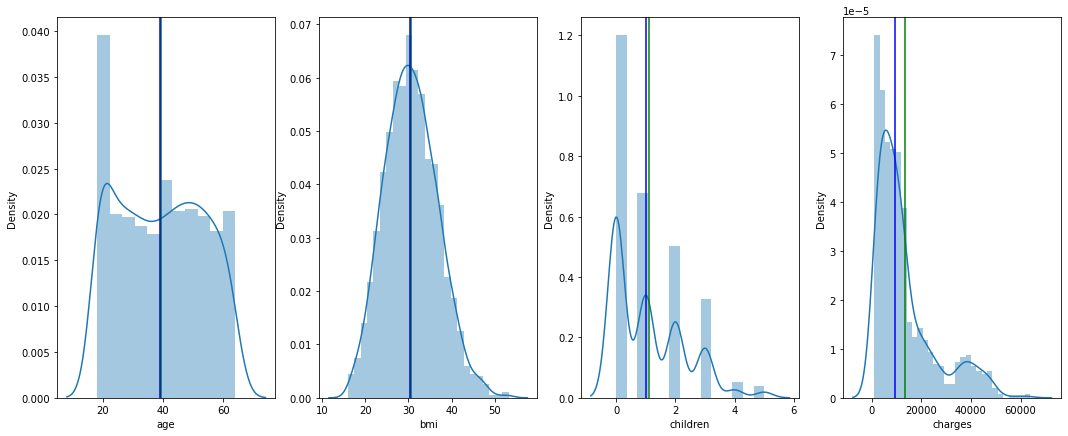

In [28]:
plt.figure(figsize=(18,7))
plt.subplot(1,4,1)
sns.distplot(df['age']);
plt.axvline(Mean(0), color='green')
plt.axvline(Med(0), color='blue')
plt.subplot(1,4,2)
sns.distplot(df['bmi']);
plt.axvline(Mean(2), color='green')
plt.axvline(Med(2), color='blue')
plt.subplot(1,4,3)
sns.distplot(df['children']);
plt.axvline(Mean(3), color='green')
plt.axvline(Med(3), color='blue')
plt.subplot(1,4,4)
sns.distplot(df['charges']);
plt.axvline(Mean(6), color='green')
plt.axvline(Med(6), color='blue')
print ("Mean = Green")
print ("Median = Blue")

#### Observations
From the Variable "Age":
- We can observe a very flat distribuion in terms of age with a spike at age 20.

From the Variable "BMI":
- Variable is normally distributed.

From the Variable "Children":
- Data shows a sort of lineal behavior where most policies having: no childrens / dependents followed by 1 - 2 childrens / dependents and very few policies having 4 childrens / dependents or more.

From the Variable "Charges":
- Right-skewed distribution with most medical costs ranging between 0 - 20000 USD, and few others with 20000 and more.

### Identifing Outliers 

Concentrating in 1 variables that presented most likehood to carry them. Data extracted from some simulations of Distplot.

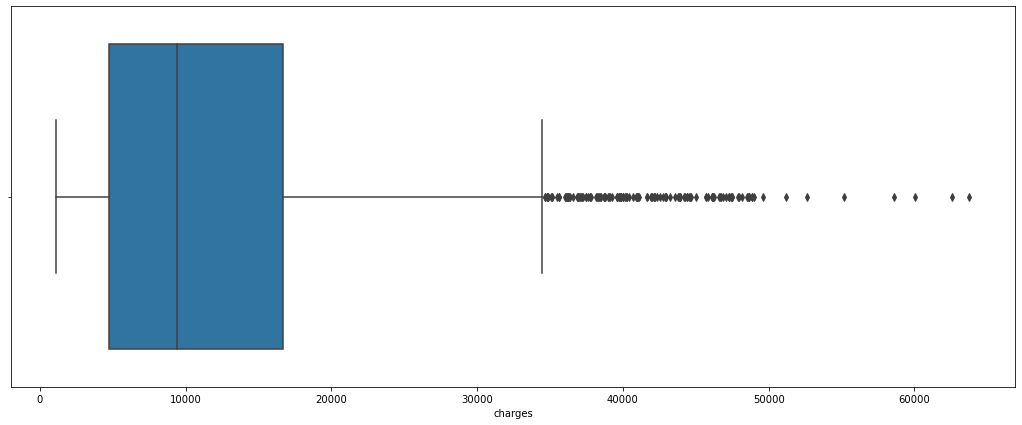

In [29]:
plt.figure(figsize=(18,7))
sns.boxplot(df['charges'], orient="v");

#### Observations
Variable "Charges":
- We can observe a big amount of outliers on the data.

In [30]:
# Function to create barplots that indicate percentage for each category.
def bar_perc(plot, feature):
    '''
    plot
    feature: 1-d categorical feature array
    '''
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 12) # annotate the percantage

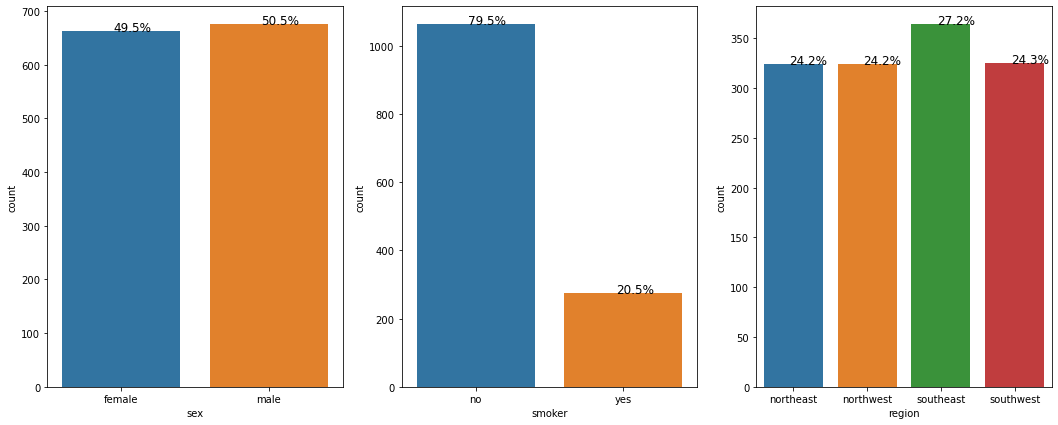

In [31]:
plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
ax = sns.countplot(df['sex']);
bar_perc(ax,df['sex'])
plt.subplot(1,3,2)
ax = sns.countplot(df['smoker']);
bar_perc(ax,df['smoker'])
plt.subplot(1,3,3)
ax= sns.countplot(df['region']);
bar_perc(ax,df['region'])

#### Observations
From the Variable "Sex":
- Male represent the majority of the counts however the difference to female is only 1.0%

From the Variable "Smoker":
- Almost 80%, precisely 79.5% of policy holders are non-smokers.

From the Variable "Region":
- This data might flag further questions: 
    1)whether the data represent a sample or the whole population
    2)the way the distribution looks like is almost equally distributed and neither a random sample nor a population should look equally distributed like that. The only region that stood out was Southeast with 27.2%. 

In [32]:
### I decided to create one more variable by transforming numerical variable "BMI" in a categorical one.
#The next lines of codes will do this.

In [33]:
#Categorizing Numerical Variable "BMI"
df['Overweight']= df['bmi']>24.9

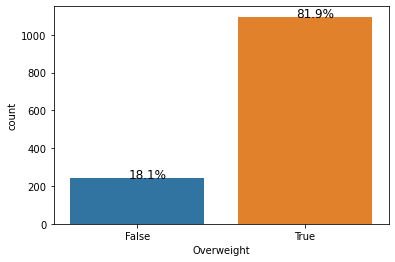

In [34]:
ax = sns.countplot(df['Overweight']);
bar_perc(ax,df['Overweight'])

### Bivariate Analysis

<AxesSubplot:>

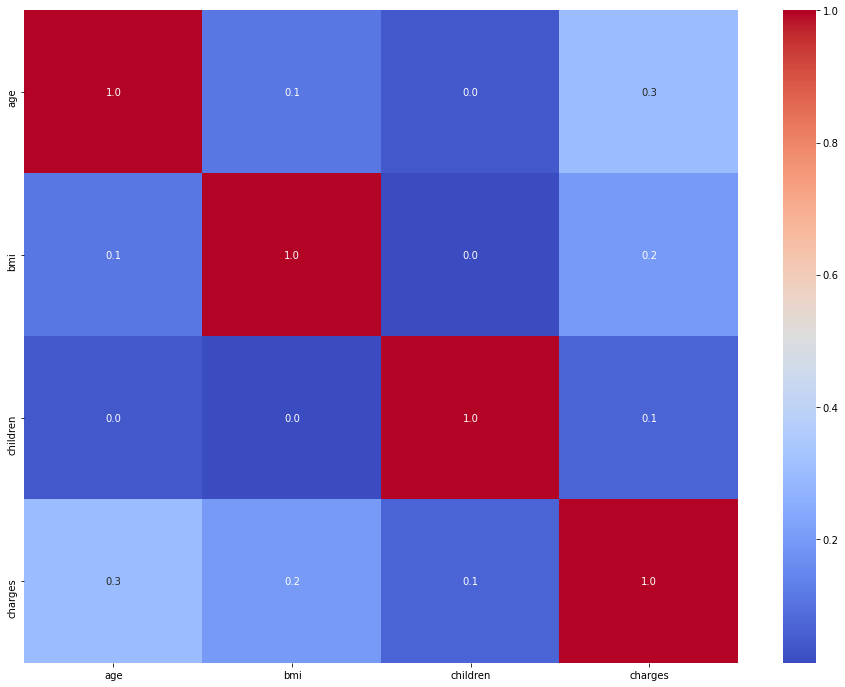

In [35]:
# Check for correlation among numerical variables
num_var = ['age','bmi','children','charges']

corr = df[num_var].corr()

# plot the heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr, annot=True,cmap='coolwarm',
        fmt=".1f",
        xticklabels=corr.columns,
        yticklabels=corr.columns)

#### Observations
- No much insights can be drawn from the Heat Map (correlation analysis).

### Multivariate Analysis

#### Observations
- what a great find where it brings the information that 81.9% of our policy holders are overweight.

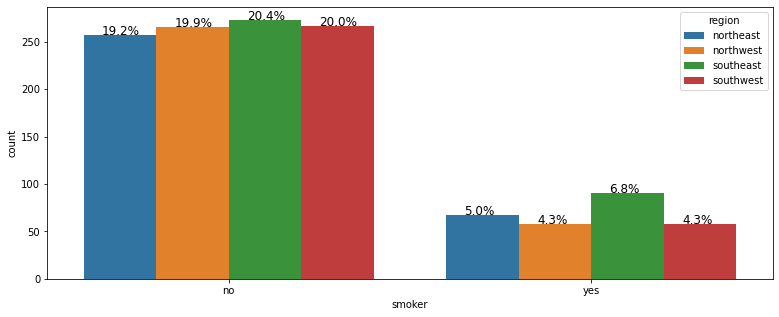

In [36]:
plt.figure(figsize=(13,5))
ax = sns.countplot(df['smoker'] , hue=df['region']);
bar_perc(ax,df['smoker'])

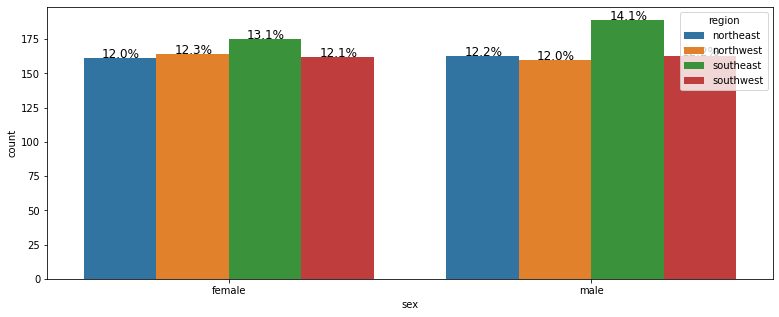

In [37]:
plt.figure(figsize=(13,5))
ax = sns.countplot(df['sex'] , hue=df['region']);
bar_perc(ax,df['sex'])

#### Observations
- Non-Smoker are spread out evenly across regions but when it comes to smokers southeast region stood out representing 33% of total of smokers are concentraded in this region making this region the one with more smokers among others. 

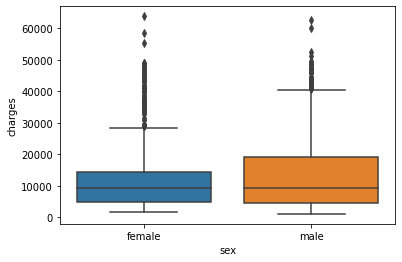

In [38]:
sns.boxplot(df['sex'], df['charges']);

#### Observations
- An interesting fact is that sex "male" showed the one who pay the higher bills in comparison to "female", excluding Outliers.

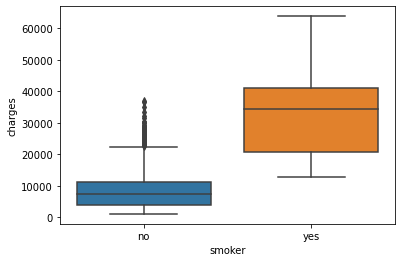

In [39]:
sns.boxplot(df['smoker'], df['charges']);

### Observations
- When variable "Charges" are correlated with variable "Smoker" is observed that all the outliers presented in the variable "Charges" correspond to non-smokers. 

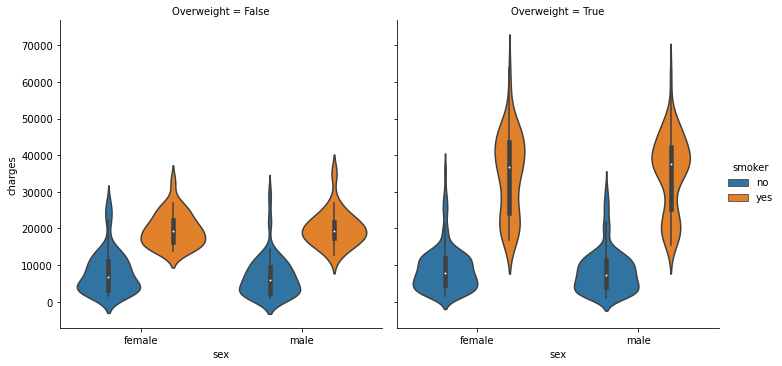

In [40]:
sns.catplot(x='sex',
           y='charges',
           hue='smoker',
           col='Overweight',
           data=df,
           kind='violin');

#### Observations
- It can be observed in average smokers have higher bills representing 2X more than non-smokers.
- Interesting found was that the average "charges" of a people who is over weight and smoker is 4X higher in comparison with people in a normal weight and non-smoker. 

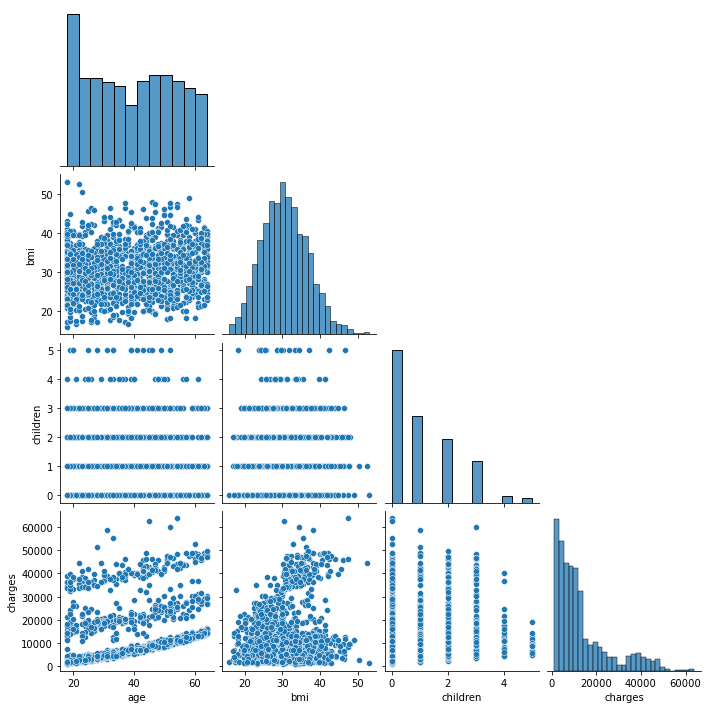

In [41]:
sns.pairplot(df[num_var], corner=True)

#### Observations
- It can be observed that "BMI" variable along with variable "Age" shows most BMI numbers are spreaded out between 20 and 40 with few points above and below of this range. Further investigation might be required to check any correlation between catogorical variables: Sex, Smoker, Region. 
- Variables "Age" with "Charge" also follows a sort of lineal behavior. Data shows that Charges (medical Costs) tend to get higher as people get old. The data also shows a interesting behavior since they are grouped in 3 different rows. Further investigation is needed to identify what are the differences among rows.
- Variable "BMI" with "Charges" shows two different grouped data with one group with "BMI" between 20 - 45 and "Charges" up to 35000 and a second group with "BMI" between 30 - 45 but "Charges" from 35000 - 50000. Further investigation is needed to identify what those groups stand for. By having this variable as categorical it may help the visualization of further insights.

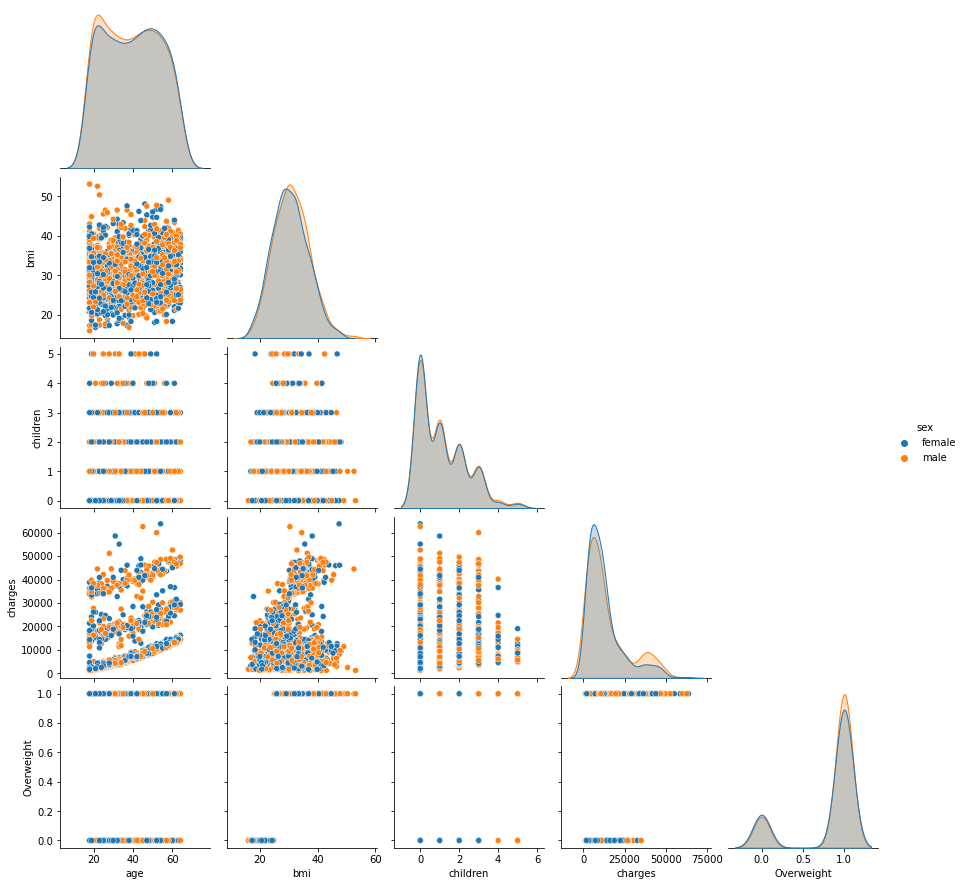

In [42]:
#I found I very good way to plot multivariate analisys by including categorical variables 
#in the pairplot. The following graphs will cover all 3 categorical variables: 'Sex','Smoker''Region
sns.pairplot(data=df, corner=True, hue='sex')

#### Observations
- As observed earlier: a difference of 1% where males were in greater quantity than females (insurance holders gender) the above chart did not show much or any strong insight or relationtioship among numerical variables.  

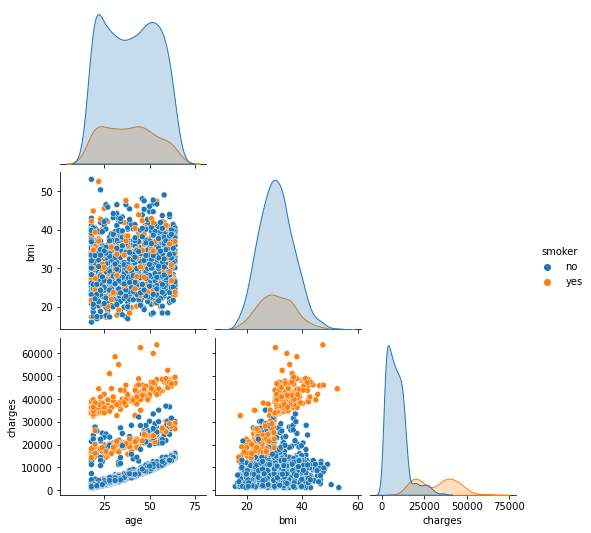

In [43]:
#Pairplot and adding categorical variable 'Smoker'
sns.pairplot(data=df.drop(['children','Overweight'],axis=1), corner=True, hue='smoker')

#### Observations
- Variables "BMI" by "Age" showed a reasonable distribution given 79.5% are non-smoker and the values do not show any relantionship of BMI with smoker or non-smoker.
- Variables "Charges" by "Age" showed an interesting relantionship with variable smoker presenting people who smokes as they pay higher bills than non-smoker with the difference representing almost 2X more.
- Variables "Charges" by BMI shows two separate group of people "smokers" in the higher scale of the chart, meaning that they pay higher bills and the data is more concentrated between 30 - 45 which indicate they are also over weight.  

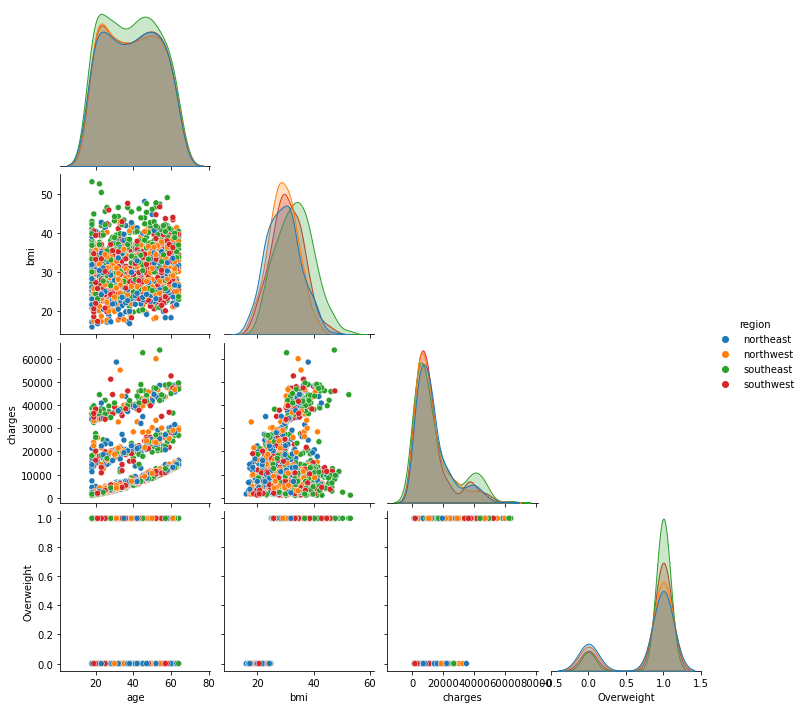

In [44]:
#Pairplot and adding categorical variable 'Region'
sns.pairplot(data=df.drop(['children'],axis=1), corner=True, hue='region')

#### Observations
- Not much valiable data from this chart. Next lines are an attempt to zoom in and check each one individually.

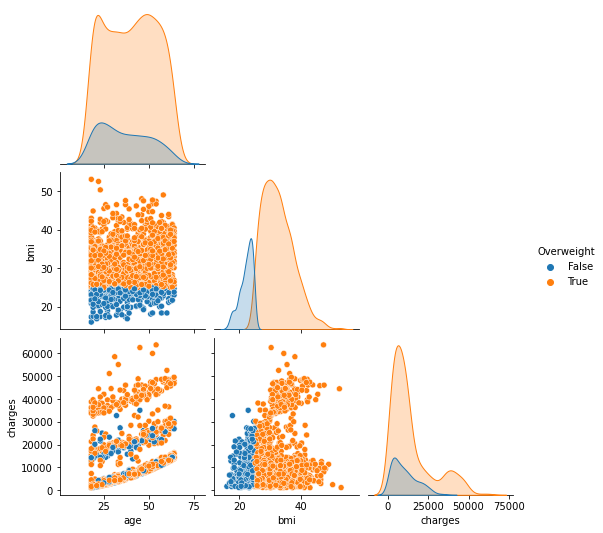

In [45]:
sns.pairplot(data=df.drop(['children'],axis=1), corner=True, hue='Overweight')

#### Observations
- most valuable information is that in average most of people at normal weight or under pay up to 25K in bills where over weight people pay up to 50K, representing 2X more.

# **Conclusion and Recommendations**

## Conclusion

It was analized a dataset of 10696 data points with information about customers of an Insurance Company.
This study was targeted to have a very comprehensive understanding of the current situation of the Insurance company customers so that risks can be assessed and further mitigated, in additional recommendations for marketing and business decisions are raised.

## Recommendation to business

1. Almost 80%, precisely 79.5% of policy holders are non-smokers. An informative approach with metrics to further reduce the remaining 20.5 might be one direction. 
2. 81.9% of our policy holders are overweight. This data makes the company aware about the risk to keep those customers however as they represent almost 4/5 of the total of the customers a marketing campaign to inform and motivate people to keep their fit might be an idea. Incentives to lower their premium as they reduce their BMI might be one idea. Additional discounts and a marketing strategy to attract healthier people may help to reduce the high percentage of over-weight people. 
- 33% of total of smokers are concentraded in southeast region along with the fact they pay 2X more than non-smoker. A strategy would be lower the sales representation in southeast region.  
- An interesting fact is that sex "male" showed the one who pay the higher bills in comparison to "female". A marketing stragegy to attract women might be something to consider.
- Over weight people pay up to 2X higher bills than people with normal weight
- Interesting found was that the average "charges" of a people who is over weight and smoker is 4X higher in comparison with people in a normal weight and non-smoker.
- A recommendation would be to create a sort of score to rate people by the risk they offer to the bussiness and whether adjusting their premium accordingly based on their risk level or try to stay away from such customers. (An example of score based on the insights from this study would look like: 
    - in a scale 1-5 (where 1 representing low risk for the business and 
                       5 representing high risk for the business)
             - (1) - Female, Non-Smokers, BMI lower than 24.9
             ....
             - (5) - Male, Smokers, BMI > 24.9 

## Future analisys

1. Additional variables like Marital Status can give additional insights when it comes to policies involving families.
2. A population study to compare the numbers found in this study, for example 79.5% of customer be over-weight might worth while before any marketing actions with attempt to attact "better" customers. They data we have might represent a sample of the population and if this is true further marketing strategies might not be so effective.
3. A better understanding why the distribution of the data per region looked like very even might worth while to pursue.




## 3. Hypothesys Testing

In [46]:
import math
from scipy import stats
from scipy.stats import ttest_ind

### - (2) Question from the Business
* Prove (or disprove) that the medical claims made by the people who smoke is greater than those who don't?
    - Setup my Null Hypothesys and Alternative Hypothesys
    - HO= Medical Claims: smokers <= non-smokers 
    - HA= Medical Claims: smokers > non-smokers
    - Population SD unknown.
    - Two samples are independent variables
    - Innitial decision to go with 2 Samples T_Test with Independent Variables
    - It was selected significance level = 0.05

In [47]:
#Next lines of codes will be to create variable "charges" related to smokers
#and let them independent from the original dataframe
new_df1 = df[(df['smoker']=='yes') & (df['charges'])]

In [48]:
new_df2 = new_df1[['charges']]

In [49]:
new_df2 # ===> Smokers and their Charges

,charges
0,16884.92400
11,27808.72510
14,39611.75770
19,36837.46700
23,37701.87680
...,...
1313,36397.57600
1314,18765.87545
1321,28101.33305
1323,43896.37630


In [50]:
new_df3 = df[(df['smoker']=='no') & (df['charges'])]

In [51]:
new_df4 = new_df3[['charges']]

In [52]:
new_df4 # ===> Non-Smokers and their Charges

,charges
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
5,3756.62160
...,...
1332,11411.68500
1333,10600.54830
1334,2205.98080
1335,1629.83350


In [53]:
#There is a imbalanced dataset (274 rows vs 1063 rows) and this code below I found out 
#online to ramdomly select an specific amount of items (sample) 
#to try to undersampling by using "s.sample" code with a function.
Balanced_df4=new_df4.apply(lambda s: s.sample(274))

In [54]:
Balanced_df4

,charges
136,1261.44200
1251,1241.56500
89,11082.57720
1198,6393.60345
33,13770.09790
...,...
299,9249.49520
308,11944.59435
1059,4462.72180
637,24915.04626


<AxesSubplot:xlabel='charges', ylabel='Density'>

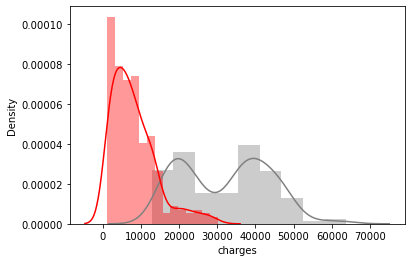

In [55]:
#Checking if are both variables normal distributed
sns.distplot(new_df2['charges'],color='grey')
sns.distplot(Balanced_df4['charges'],color='red')

In [56]:
#Checking if both variables have the same variance
print(new_df2['charges'].var())
print(Balanced_df4['charges'].var())

133207311.20634921
34722120.9905549


In [57]:
#StandardScaler() used since distplots identified a no normal distribution, and right swkewness
#over variable charges
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler()
std_scale

StandardScaler()

In [58]:
#Check for null values
Balanced_df4['charges'].isnull().sum()

0

In [59]:
Balanced_df4['charges_trans'] = std_scale.fit_transform(Balanced_df4[['charges']]) # Transform values
new_df2['charges_trans'] = std_scale.fit_transform(new_df2[['charges']]) # Transform values 

<AxesSubplot:xlabel='charges_trans', ylabel='Density'>

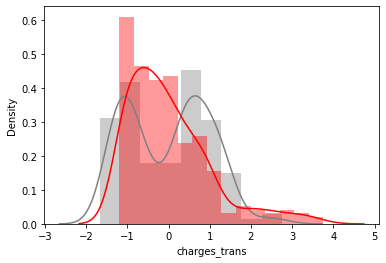

In [60]:
#Distplot after scale the data showed a more normal distribution.
sns.distplot(new_df2['charges_trans'],color='grey')
sns.distplot(Balanced_df4['charges_trans'],color='red')

In [61]:
new_df2.mean()

charges          3.205023e+04
charges_trans    4.941303e-16
dtype: float64

In [62]:
# HO= Medical Claims: smokers <= non-smokers 
# HA= Medical Claims: smokers > non-smokers
#Equal variance is false.
t_statistic, p_value = stats.ttest_ind(new_df2['charges_trans'], Balanced_df4['charges_trans'], equal_var = False)
print(t_statistic, p_value)

5.756514031788361e-15 0.9999999999999954


In [63]:
("two-sample t-test p-value one tail=", p_value/2)

('two-sample t-test p-value one tail=', 0.4999999999999977)

#### Conclusion question (2):

T-test independent variables resulted in a p-value = 0.49 which is bigger than 0.05 (significance level). Hence this test reject null hypothesis meaning in fact Smokers have their Medical Claims greater than Non-Smokers.

### - (3) Question from the Business
* Prove (or disprove) with statistical evidence that the BMI of females is different from that of males.
    - Setup my Null Hypothesys and Alternative Hypothesys
    -HO= BMI: female = male
    -HA= BMI: female != male
    - Population SD unknown.   
    - Two Tail test, indenpendent variables.
    - Two sample t-test was selected. 
    - It was selected significance level = 0.05

In [64]:
#Extracting data from dataframe for statistical analysis.
#BMI for females = variable bmiF
#BMI for males = variable bmiM
bmiF_test = df[(df['sex']=='female') & (df['bmi'])]
bmiF = bmiF_test[['bmi']]
bmiM_test = df[(df['sex']=='male') & (df['bmi'])]
bmiM = bmiM_test[['bmi']]

In [65]:
t_statistic, p_value = ttest_ind(bmiF, bmiM)
print(t_statistic, p_value)

[-1.69706723] [0.08991704]


significance level = 0.05 

#### Conclusion question (3)
- We have no evidence to reject the null hypothesis since p value = 0.089 and it is greater than the significance level.

### - (4) Question from the Business
* Is the proportion of smokers significantly different across different regions?.
    - Setup my Null Hypothesys and Alternative Hypothesys
    -Null Hypothesys = the proportion of smokers are equal across regions
    - Alternative hypothesis = the proportion of smokers is significantly different across regions
    - 2 categorical variables (2> samples), decision to go with Chi-Square test
    - It was selected significance level = 0.05

In [66]:
from scipy.stats import chi2_contingency

In [67]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Overweight
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,True


In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'Overweight'],
      dtype='object')

In [69]:
#Creating Contingency table / Cross tab for vaiables 'Sex' and 'Region'
contigency= pd.crosstab(df['sex'], df['region']) 
contigency

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,160,189,163


In [70]:
# Chi-square test
c, p_value, dof, expected = chi2_contingency(contigency)
# Print the p-value
print(p_value)

0.9239341965125791


significance level = 0.05 

#### Conclusion question (4)
- We have no evidence to reject the null hypothesis since p value = 0.9239 is greater than the significance level, meaning the proportion of smokers are equal across regions

### - (5) Question from the Business
* Is the mean BMI of women with no children, one child, and two children the same?.
    - Setup my Null Hypothesys and Alternative Hypothesys
    - Null Hypothesys = 
                        BMI mean for women with no children is EQUAL to 
                        BMI mean for women with one children which is EQUAL to 
                        BMI mean for women with two children
    - Alternative hypothesis = 
                        BMI mean for women with no children is DIFFERENT from 
                        BMI mean for women with one children which is DIFFERENT from 
                        BMI mean for women with two children  
 
    - 3 continuous variables to be tested (> 2 samples), decision to go with ANOVA 
    - It was selected significance level = 0.05                    
                               

In [71]:
from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

In [72]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Overweight
0,19,female,27.900,0,yes,southwest,16884.92400,True
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,True


In [73]:
df_anova = df.copy()
df_anova.drop(['age','smoker','region','charges'],axis=1,inplace=True)

In [74]:
df_anova.head()


,sex,bmi,children,Overweight
0,female,27.900,0,True
1,male,33.770,1,True
2,male,33.000,3,True
3,male,22.705,0,False
4,male,28.880,0,True


In [75]:
dfanovaf = df_anova[(df_anova['sex'] =="female")]
dfanovaf

,sex,bmi,children,Overweight
0,female,27.90,0,True
5,female,25.74,0,True
6,female,33.44,1,True
7,female,27.74,3,True
9,female,25.84,0,True
...,...,...,...,...
1332,female,44.70,3,True
1334,female,31.92,0,True
1335,female,36.85,0,True
1336,female,25.80,0,True


In [76]:
#Checking Distinct values of Children
dfanovaf.children.value_counts()

0    289
1    158
2    119
3     77
4     11
5      8
Name: children, dtype: int64

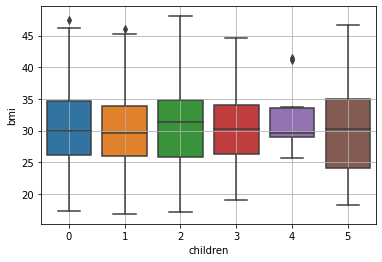

In [77]:
#data is very even with mean of 2 children slightly higher than others
sns.boxplot(x="children", y="bmi", data=dfanovaf)
plt.grid()
plt.show()

#### One-way ANOVA with the 'children' variable

In [78]:
formula = 'bmi ~ C(children)'
model = ols(formula, dfanovaf).fit()
aov_table = anova_lm(model)
print(aov_table)

                df        sum_sq    mean_sq         F    PR(>F)
C(children)    5.0     53.274335  10.654867  0.289914  0.918623
Residual     656.0  24109.180862  36.751800       NaN       NaN


The variance between variable children is low, meaning that this variance
is 0.28 times the variance within BMI variable variance.


#### Conclusion question (5)
- We have no evidence to reject the null hypothesis since p value = 0.918623 is greater than the significance level.

In [82]:
#Export notebook to HTML type.
import os
os.system('jupyter nbconvert --to html Project_All_Life_Bank_Customer_Segmentation.ipynb')

-1